In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
world_dir = r'world map'

land = gpd.read_file(world_dir + r'/ne_110m_land/ne_110m_land.shp')
rivers = gpd.read_file(world_dir + r'/ne_110m_rivers_lake_centerlines/ne_110m_rivers_lake_centerlines.shp')
lakes = gpd.read_file(world_dir + r'/ne_110m_lakes/ne_110m_lakes.shp')


In [4]:
lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
lakes.to_crs(3857)
lakes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
rivers = gpd.read_file(world_dir + r'/ne_110m_rivers_lake_centerlines/ne_110m_rivers_lake_centerlines.shp')
rivers.head()

,scalerank,featurecla,name,name_alt,min_zoom,name_en,min_label,wikidataid,label,name_ar,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,2,River,Brahmaputra,None,2.1,Brahmaputra,3.1,Q45403,Brahmaputra,نهر براهمابوترا,...,Brahmaputra,Rio Bramaputra,Брахмапутра,Brahmaputra,Brahmaputra Nehri,Brahmaputra,布拉马普特拉河,4,1159120261,"LINESTRING (82.40048 30.41148, 82.72273 30.365..."
1,2,River,Mekong,None,2.1,Mekong,3.1,Q41179,Mekong,نهر ميكونغ,...,Mekong,Rio Mekong,Меконг,Mekong,Mekong,Mê Kông,湄公河,4,1159121023,"LINESTRING (94.08400 33.15586, 94.44770 33.163..."
2,2,River,Ob,None,2.1,Ob,3.1,Q973,Ob,أوبي,...,Ob,Rio Ob,Обь,Ob,Obi Nehri,Sông Obi,鄂畢河,4,1159114911,"LINESTRING (90.32537 47.65017, 90.20052 47.408..."
3,2,River,Peace,None,2.1,Peace,3.1,Q2220,Peace,None,...,Peace,Rio Peace,Пис,Peace,None,None,皮斯河,4,1159117465,"LINESTRING (-124.83563 56.75692, -124.20045 56..."
4,2,River,Donau,Danube,2.1,Danube,3.1,Q1653,Donau,دانوب,...,Dunaj,Rio Danúbio,Дунай,Donau,Tuna,Sông Donau,多瑙河,4,1159118769,"LINESTRING (8.21979 48.04681, 8.55336 47.98082..."


In [7]:
land = gpd.read_file(world_dir + r'/ne_110m_land/ne_110m_land.shp')
land = land.to_crs(3857)
land.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-6631535.247 -15564519.563, -6664235..."
1,Land,1,1.0,"POLYGON ((-17722973.924 -15224058.952, -179366..."
2,Land,1,0.0,"POLYGON ((-5026604.629 -14393934.986, -4889244..."
3,Land,1,1.0,"POLYGON ((-13493203.727 -12317011.687, -133493..."
4,Land,1,1.0,"POLYGON ((-13977226.997 -12309318.971, -138071..."


In [8]:
rivers = rivers.to_crs(3857)

In [9]:
land['area'] = land.area
land.head()

,featurecla,scalerank,min_zoom,geometry,area
0,Land,1,1.0,"POLYGON ((-6631535.247 -15564519.563, -6664235...",3.153879e+11
1,Land,1,1.0,"POLYGON ((-17722973.924 -15224058.952, -179366...",2.403606e+11
2,Land,1,0.0,"POLYGON ((-5026604.629 -14393934.986, -4889244...",1.405920e+12
3,Land,1,1.0,"POLYGON ((-13493203.727 -12317011.687, -133493...",6.827085e+10
4,Land,1,1.0,"POLYGON ((-13977226.997 -12309318.971, -138071...",2.987816e+10


In [10]:
lakes['buffer'] = lakes.buffer(100_000)
lakes.head()

/var/folders/bh/rxt6xw0n4y19qdy1f5lnr_600000gn/T/ipykernel_9680/2852858243.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lakes['buffer'] = lakes.buffer(100_000)


,scalerank,featurecla,name,name_alt,admin,min_zoom,min_label,name_abb,label,wikidataid,...,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry,buffer
0,0,Lake,Lake Baikal,None,None,1.0,3.0,L. Baikal,Lake Baikal,Q5513,...,Lago Baikal,Байкал,Bajkalsjön,Baykal Gölü,Hồ Baikal,贝加尔湖,4,1159113127,"POLYGON ((106.57999 52.79998, 106.53999 52.940...","POLYGON ((-99877.65337 1396.24146, -99882.4456..."
1,0,Lake,Lake Winnipeg,None,None,1.0,3.0,L. Winnipeg,Lake Winnipeg,Q3272,...,Lago Winnipeg,Виннипег,Winnipegsjön,Winnipeg Gölü,Hồ Winnipeg,溫尼伯湖,4,1159106747,"POLYGON ((-98.95540 53.92978, -97.95799 54.337...","POLYGON ((-93125.13107 36743.58283, -88955.008..."
2,0,Lake,Great Slave Lake,None,None,1.0,3.0,Great Slave L.,Great Slave Lake,Q5539,...,Grande Lago do Escravo,Большое Невольничье озеро,Stora Slavsjön,Büyük Esir Gölü,Hồ Slave Lớn,大奴湖,4,1159106729,"POLYGON ((-115.00000 61.97239, -115.80670 62.5...","POLYGON ((-100042.54117 -3712.36968, -100046.4..."
3,0,Lake,Lake Ontario,Great Lakes,admin-0,1.0,3.0,L. Ontario,Lake Ontario,Q1062,...,Lago Ontário,Онтарио,Ontariosjön,Ontario Gölü,Hồ Ontario,安大略湖,4,1159106765,"POLYGON ((-79.05631 43.25410, -79.36169 43.202...","POLYGON ((197.68247 -99841.23848, -3361.55344 ..."
4,0,Lake,Lake Erie,Great Lakes,admin-0,1.0,3.0,L. Erie,Lake Erie,Q5492,...,Lago Erie,Эри,Eriesjön,Erie Gölü,Hồ Erie,伊利湖,4,1159106757,"POLYGON ((-83.12001 42.08002, -82.57123 42.017...","POLYGON ((-74856.07230 66442.42343, -68155.014..."


In [11]:
land['boundary'] = land.boundary
land['centroid'] = land.centroid

In [12]:
rivers['buffer'] = rivers.buffer(500_000)

<AxesSubplot:title={'center':'World Map'}>

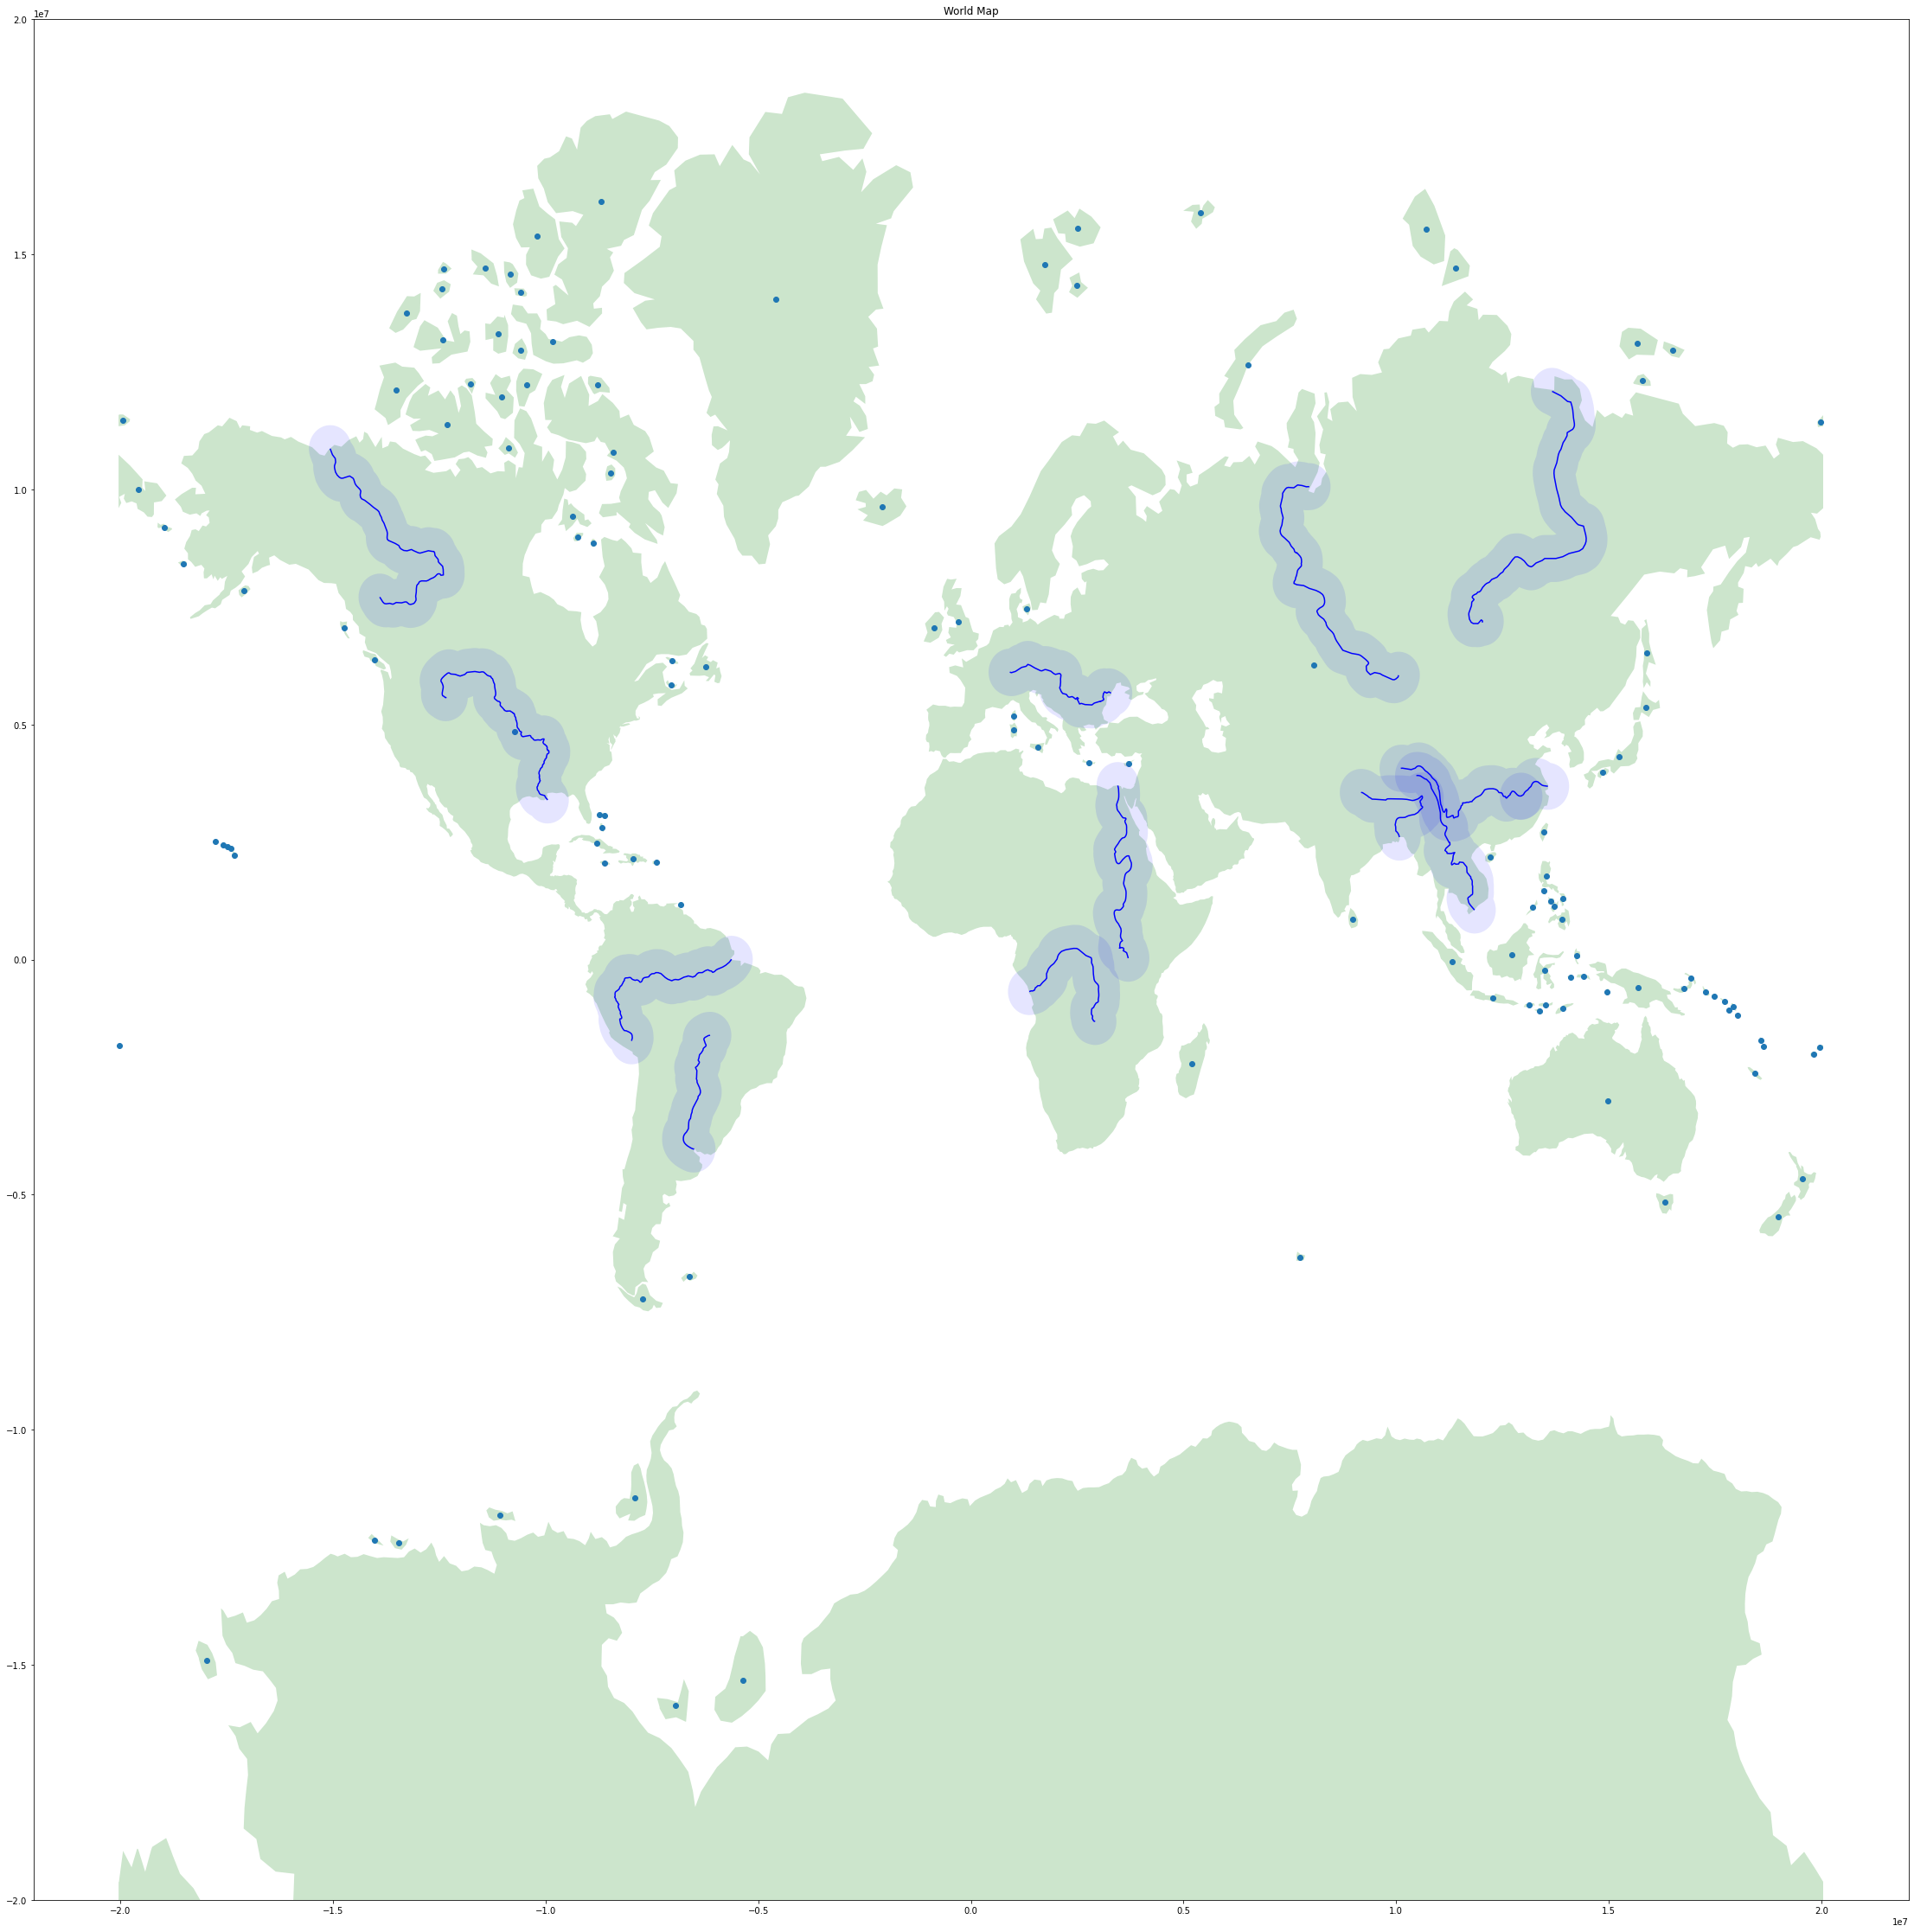

In [13]:
fig, axes = plt.subplots(figsize=(40, 40))
axes.set_title('World Map')
axes.set_ylim(-0.2e8, 0.2e8)

land['geometry'].plot(ax=axes, color='green', alpha=0.2)
land['centroid'].plot(ax=axes)
rivers['geometry'].plot(ax=axes, color='blue')
rivers['buffer'].plot(ax=axes, color='blue', alpha=0.1)
lakes['geometry'].plot(ax=axes, color='blue')

In [14]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [16]:
import contextily as cx

fig, axes = plt.subplots(figsize=(40, 40))
axes.set_title('World Map')
axes.set_ylim(-0.2e8, 0.2e8)

land['geometry'].plot(ax=axes, alpha=0.3)
cx.add_basemap(axes, source=cx.providers.OpenTopoMap)

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [27]:
countries_by_coninents = world.dissolve(by='continent', as_index=True)

In [36]:
countries_by_coninents.head()

,geometry,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Africa,"MULTIPOLYGON (((40.43725 -11.76171, 40.56081 -...",53950935,Tanzania,TZA,150600.0
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050,Antarctica,ATA,810.0
Asia,"MULTIPOLYGON (((120.29501 -10.25865, 118.96781...",18556698,Kazakhstan,KAZ,460700.0
Europe,"MULTIPOLYGON (((-53.77852 2.37670, -54.08806 2...",142257519,Russia,RUS,3745000.0
North America,"MULTIPOLYGON (((-78.21494 7.51225, -78.42916 8...",35623680,Canada,CAN,1674000.0


In [29]:
countries_by_coninents.explore()

In [30]:
countries_by_coninents.to_file(world_dir + r'/counries', driver='GeoJSON')